In [1]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

In [4]:
data = data[data['gameDuration']>=300]

In [5]:
data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [6]:
data

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
51486,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0
51488,2,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0


In [7]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.9742519137091162


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.97495   0.97437   0.97466      5112
           2    0.97354   0.97413   0.97383      4947

    accuracy                        0.97425     10059
   macro avg    0.97424   0.97425   0.97425     10059
weighted avg    0.97425   0.97425   0.97425     10059



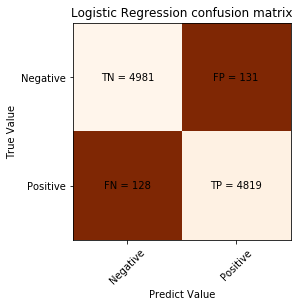

In [136]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges_r)
classNames = ['Negative', 'Positive']
plt.title('Logistic Regression confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

plt.savefig("LR_con", dpi=240, bbox_inches='tight')


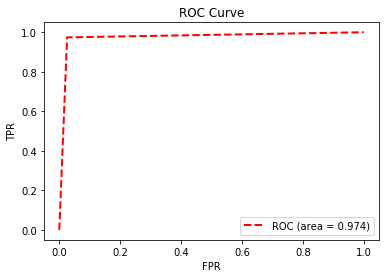

In [137]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thersholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', color='red',label='ROC (area = {0:.3f})'.format(roc_auc), lw=2)

    
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('LR-roc',dpi=240,bbox_inches='tight')
plt.show()

In [14]:
predictor={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t1_riftHeraldKills", "t2_tower","t2_inhibitor","t2_baron","t2_dragon","t2_riftHeraldKills"],
         "value":[1,1,2,1,1,1,10,2,3,1,1,7,2,1,1,1]}
scen=pd.DataFrame(predictor)
scen

,feature,value
0,first_blood,1
1,first_tower,1
2,first_inhibitor,2
3,first_Baron,1
4,first_Dragon,1
5,first_RiftHerald,1
6,t1_tower,10
7,t1_inhibitor,2
8,t1_baron,3
9,t1_dragon,1


In [27]:
x1=[[1,1,2,1,1,1,10,2,3,1,1,7,2,1,1,1]]
c= lr.predict_proba(x1).reshape(-1,1)
print("winner is :" , lr.predict(x1) )
print("first team win probability is % ", list(c[0]*100),
      "\nsecond team win probability is %:",list(c[1]*100))

winner is : [1]
first team win probability is %  [98.9829289342623] 
second team win probability is %: [1.0170710657376971]


In [29]:
x1=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c= lr.predict_proba(x1).reshape(-1,1)
print("winner is :" , lr.predict(x1) )
print("first team win probability is % ", list(c[0]*100),
      "\nsecond team win probability is %:",list(c[1]*100))

winner is : [2]
first team win probability is %  [27.76766272479326] 
second team win probability is %: [72.23233727520673]
